# Counting Statistics Experiment

During my undegraduate laboratory assignments I was tasked with an assingment to analyze the probability of quantum mechanical events happening at a given time interval. We used the decay of stronium isotopes as a source of electrons (or beta radiation). We took the data on a Geiger-Müller counter and generated historgrams to describe the random emission of electrons in the apparatus.

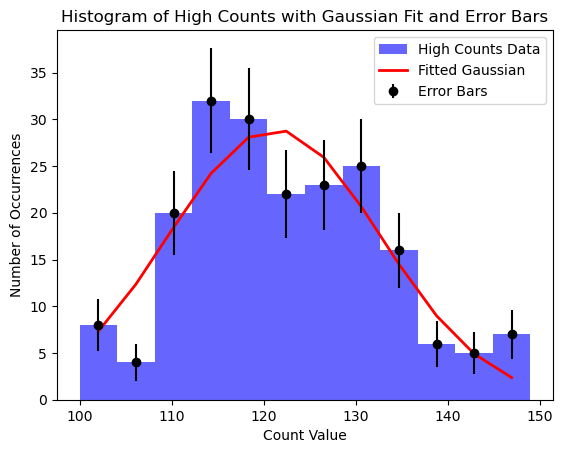

Mean from Gaussian Fit: 121.15949080466852
Variance from Gaussian Fit: 132.9469768431485


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

#read data
file_path = 'Counting statistics/CSHighCounts.csv'
data = read_csv_data(file_path)

# Check if data is loaded
if data is not None:
    # Replace 'highcounts' with the actual column name from your CSV file
    counts_data = data['highcounts']

    # Gaussian function for fitting
    def gaussian(x, mean, amplitude, standard_deviation):
        return amplitude * np.exp(- ((x - mean)**2 / (2 * standard_deviation**2)))

    # Function to plot histogram with Gaussian fit and error bars
    def plot_histogram(data, title, label, color='b'):
        # Create a histogram for the data
        bin_counts, bin_edges, _ = plt.hist(data, bins=12, alpha=0.6, color=color, label=label)

        # Calculate bin centers
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Estimate error for each bin
        errors = np.sqrt(bin_counts)

        # Perform Gaussian fit
        popt, _ = curve_fit(gaussian, bin_centers, bin_counts, p0=[np.mean(data), np.max(bin_counts), np.std(data)])

        # Plot the fitted Gaussian curve
        plt.plot(bin_centers, gaussian(bin_centers, *popt), color='red', lw=2, label='Fitted Gaussian')

        # Add error bars
        plt.errorbar(bin_centers, bin_counts, yerr=errors, fmt='o', color='black', label='Error Bars')

        # Add labels and title
        plt.xlabel('Count Value')
        plt.ylabel('Number of Occurrences')
        plt.title(title)
        plt.legend()

        # Show the plot
        plt.show()
        
        # Mean and variance from Gaussian fit
        mean = popt[0]
        variance = popt[2] ** 2
        
        return mean, variance
        # Read data
        file_path = 'Counting statistics/CSHighCounts.csv'
        data = read_csv_data(file_path)

        # Check if data is loaded
if data is not None:
        # Replace 'highcounts' with the actual column name from your CSV file
        counts_data = data['highcounts']

        # Plot the histogram and get the mean and variance
        mean, variance = plot_histogram(counts_data, 'Histogram of High Counts with Gaussian Fit and Error Bars', 'High Counts Data')

        # Print the mean and variance
        print(f"Mean from Gaussian Fit: {mean}")
        print(f"Variance from Gaussian Fit: {variance}")

else:
    print("No data to plot.")
    
    # Plot the histogram
    plot_histogram(counts_data, 'Histogram of High Counts with Gaussian Fit and Error Bars', 'High Counts Data')
    

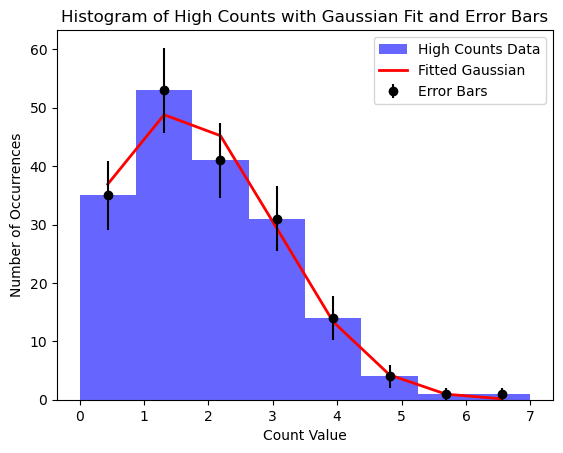

Mean from Gaussian Fit: 1.5619497708481407
Variance from Gaussian Fit: 2.152224741749451


In [40]:
#read data
file_path = 'Counting statistics/CSLowCounts.csv'
data = read_csv_data(file_path)

# Check if data is loaded
if data is not None:
    counts_data = data['lowcounts']

    # Gaussian function for fitting
    def gaussian(x, mean, amplitude, standard_deviation):
        return amplitude * np.exp(- ((x - mean)**2 / (2 * standard_deviation**2)))

    # Function to plot histogram with Gaussian fit and error bars
    def plot_histogram(data, title, label, color='b'):
        # Create a histogram for the data
        bin_counts, bin_edges, _ = plt.hist(data, bins=8, alpha=0.6, color=color, label=label)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        errors = np.sqrt(bin_counts)

        # Perform Gaussian fit
        popt, _ = curve_fit(gaussian, bin_centers, bin_counts, p0=[np.mean(data), np.max(bin_counts), np.std(data)])

        # Plot the fitted Gaussian curve
        plt.plot(bin_centers, gaussian(bin_centers, *popt), color='red', lw=2, label='Fitted Gaussian')

        # Add error bars
        plt.errorbar(bin_centers, bin_counts, yerr=errors, fmt='o', color='black', label='Error Bars')

        # Add labels and title
        plt.xlabel('Count Value')
        plt.ylabel('Number of Occurrences')
        plt.title(title)
        plt.legend()

        # Show the plot
        plt.show()

  # Mean and variance from Gaussian fit
        mean = popt[0]
        variance = popt[2] ** 2
        
        return mean, variance
        # Read data
        file_path = 'Counting statistics/CSLowCounts.csv'
        data = read_csv_data(file_path)

        # Check if data is loaded
if data is not None:
        # Replace 'highcounts' with the actual column name from your CSV file
        counts_data = data['lowcounts']

        # Plot the histogram and get the mean and variance
        mean, variance = plot_histogram(counts_data, 'Histogram of High Counts with Gaussian Fit and Error Bars', 'High Counts Data')

        # Print the mean and variance
        print(f"Mean from Gaussian Fit: {mean}")
        print(f"Variance from Gaussian Fit: {variance}")

else:
    print("No data to plot.")
    
    # Plot the histogram
    plot_histogram(counts_data, 'Histogram of Low Counts with Gaussian Fit and Error Bars', 'Low Counts Data')

The provided code is designed to read a set of count data from a CSV file, plot this data as a histogram, and then fit a Gaussian distribution to this histogram. This process is particularly useful for analyzing distributions of count data, which often approximate a Gaussian (or normal) distribution under certain conditions.

### Reading and Plotting Data: 
The code begins by reading count data from a CSV file using the Pandas library. The `read_csv_data` function handles this task, returning a DataFrame containing the data. 
The plotting part of the code is encapsulated in the `plot_histogram` function. This function takes the count data, creates a histogram using Matplotlib, and calculates the number of occurrences for each bin. The bins represent different ranges of count values, and the number of occurrences (or frequency) in each bin is plotted. The function also calculates and displays error bars for each bin, which are derived from the square root of the bin counts, a common practice in statistics when dealing with count data.

### Gaussian Fitting: 
A Gaussian distribution, characterized by its mean and standard deviation, is a common way to represent symmetrical data clustered around a central value. The code defines a Gaussian function (`gaussian`) that takes a set of x-values (bin centers in this case), a mean, an amplitude, and a standard deviation as inputs and returns the corresponding y-values of the Gaussian curve. The `curve_fit` function from SciPy’s optimization module is then used to find the optimal parameters (mean, amplitude, and standard deviation) for the Gaussian function that best fits the histogram data. This fitting process involves minimizing the difference between the actual bin counts and the counts predicted by the Gaussian function. The resulting Gaussian curve is plotted over the histogram to visually represent the fit.
